## Warehouse and Retail Sales Data Analysis Using Multivariate Techniques and Machine Learning

## Data Cleaning and Modifications

Null values in the dataset:
 YEAR                    0
MONTH                   0
SUPPLIER                0
ITEM CODE               0
ITEM DESCRIPTION        0
ITEM TYPE               0
RETAIL SALES            0
RETAIL TRANSFERS        0
WAREHOUSE SALES         0
SUPPLIER_ID             0
ITEM_CATEGORY       12682
dtype: int64


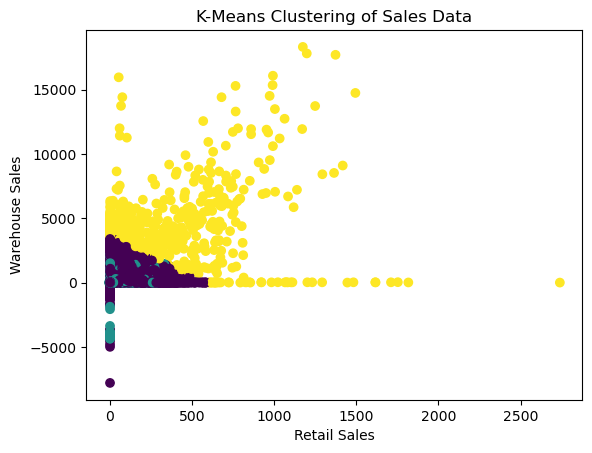

   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  SUPPLIER_ID ITEM_CATEGORY  Cluster  
0               0.0              2.0          273             A        1  
1               1.0              4.0          264             A        1  

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset from the provided file path
file_path = r'C:\Users\ADMIN PC\Downloads\projects\Navya DA2\Warehouse_and_Retail_Sales.csv'
df = pd.read_csv(file_path)

# 1. We Generated a unique supplier IDs
df['SUPPLIER_ID'] = df['SUPPLIER'].astype('category').cat.codes

# 2. We Created categories for WINE, BEER, LIQUOR
category_mapping = {'WINE': 'A', 'BEER': 'B', 'LIQUOR': 'C'}
df['ITEM_CATEGORY'] = df['ITEM TYPE'].map(category_mapping)

# 3. Handle missing values
# Impute missing values for SUPPLIER with the mode (most frequent supplier)
df['SUPPLIER'].fillna(df['SUPPLIER'].mode()[0], inplace=True)

# Imputing missing values for ITEM TYPE with the mode (most frequent type)
df['ITEM TYPE'].fillna(df['ITEM TYPE'].mode()[0], inplace=True)

# Imputing missing values for RETAIL SALES with the mean
df['RETAIL SALES'].fillna(df['RETAIL SALES'].mean(), inplace=True)

# Checking if there are still any missing values
print("Null values in the dataset:\n", df.isnull().sum())

# 4. Perform K-Means Clustering
# Select relevant features for clustering
X = df[['RETAIL SALES', 'WAREHOUSE SALES', 'SUPPLIER_ID']]

# Standardize the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Save the updated dataset back to the same path with a new name
output_file_path = r'C:\Users\ADMIN PC\Downloads\projects\Navya DA2\Warehouse_and_Retail_Sales_Updated.csv'
df.to_csv(output_file_path, index=False)

# 5. Visualize the clusters
plt.scatter(df['RETAIL SALES'], df['WAREHOUSE SALES'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.title('K-Means Clustering of Sales Data')
plt.show()

# Preview the first few rows of the updated dataset
print(df.head())


## Data Understanding and preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"/content/Warehouse_and_Retail_Sales_Updated.csv"
data = pd.read_csv(file_path)

# Display basic dataset information
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Set Seaborn style for cleaner visuals
sns.set(style="whitegrid")

First 5 rows of the dataset:
   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  SUPPLIER_ID ITEM_CATEGORY  Cluster  
0               0.0              2.0          273             A        1  
1               1.0              4.0         

## Exploratory Data Analysis

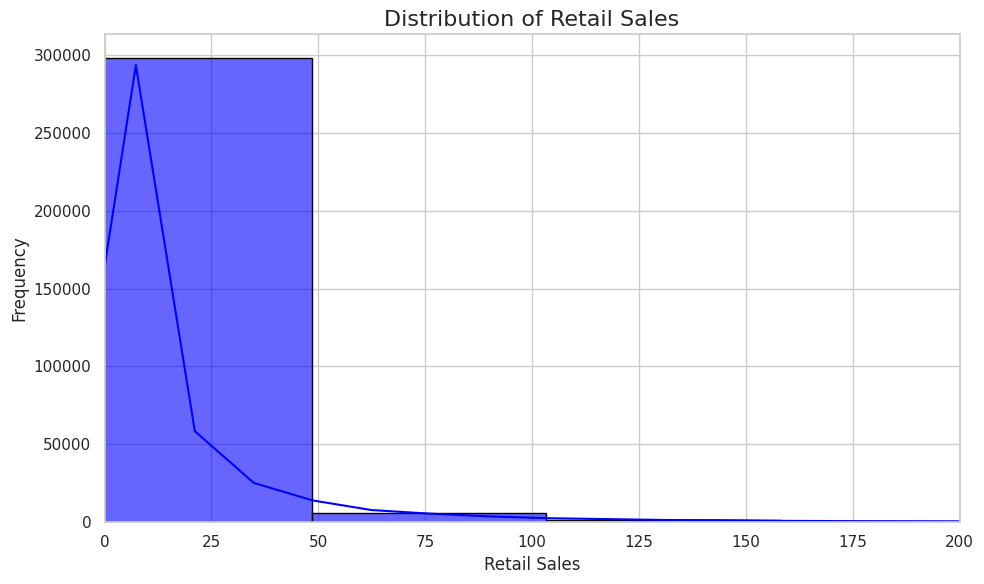

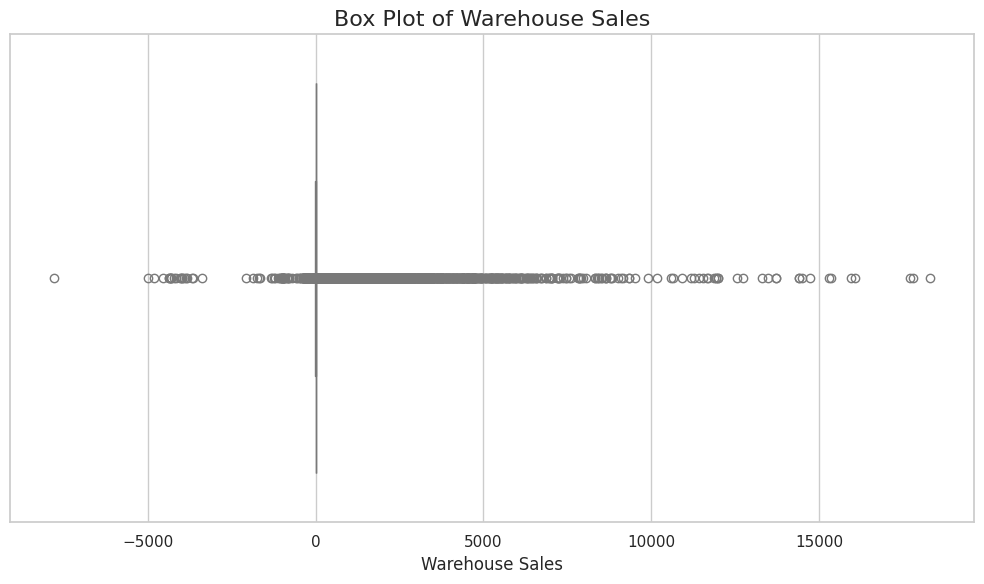

<ipython-input-4-a4c3ac27b0f7>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['ITEM TYPE'], palette='viridis', order=data['ITEM TYPE'].value_counts().index)


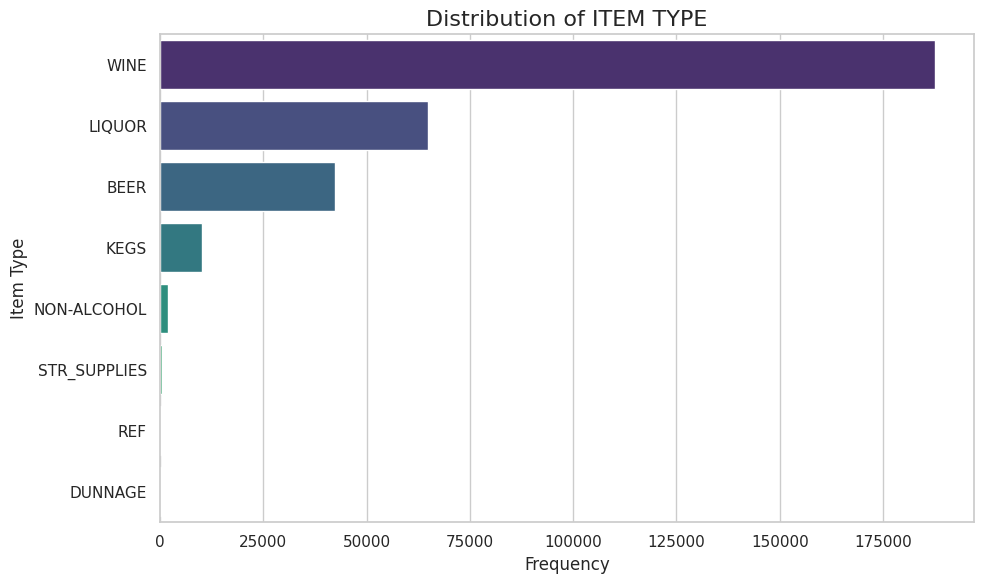

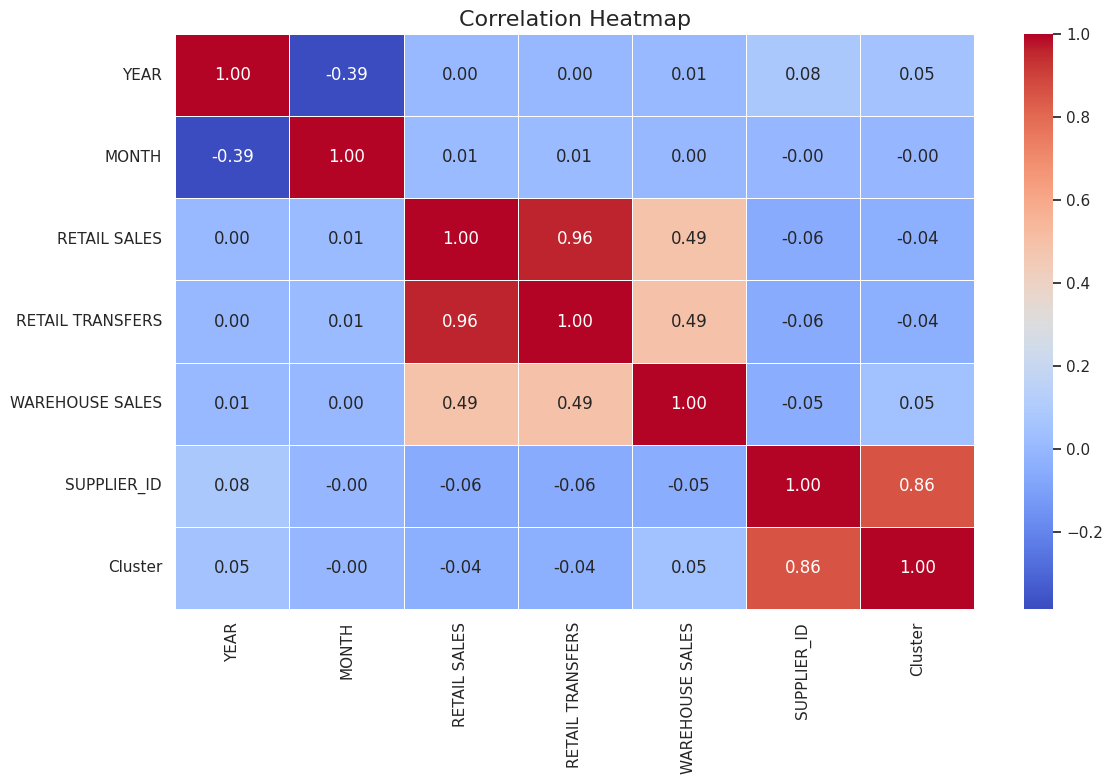

In [4]:
# 1. Distribution Plot for RETAIL SALES
if 'RETAIL SALES' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['RETAIL SALES'], bins=50, kde=True, color='blue', alpha=0.6, edgecolor='black')
    plt.title('Distribution of Retail Sales', fontsize=16)
    plt.xlabel('Retail Sales', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlim(0, 200)  # Restricting x-axis to 0-500
    plt.tight_layout()
    plt.show()
else:
    print("\nColumn 'RETAIL SALES' not found in the dataset.")


# 2. Box Plot for WAREHOUSE SALES
if 'WAREHOUSE SALES' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['WAREHOUSE SALES'], color='lightblue')
    plt.title('Box Plot of Warehouse Sales', fontsize=16)
    plt.xlabel('Warehouse Sales', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("\nColumn 'WAREHOUSE SALES' not found in the dataset.")

# 3. Bar Plot for ITEM TYPE Distribution
if 'ITEM TYPE' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data['ITEM TYPE'], palette='viridis', order=data['ITEM TYPE'].value_counts().index)
    plt.title('Distribution of ITEM TYPE', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Item Type', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("\nColumn 'ITEM TYPE' not found in the dataset.")

# 4. Heatmap for Numeric Data Correlations
numeric_data = data.select_dtypes(include=['float64', 'int64'])
if not numeric_data.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo numeric columns found for correlation heatmap.")


## DataModeling and Methodology

## Multiple Regression Analysis

Multiple Regression Analysis (Retail Sales Prediction)
Retail Sales - Mean Squared Error: 85.301411213772
Retail Sales - R2 Score: 0.9099244688423892


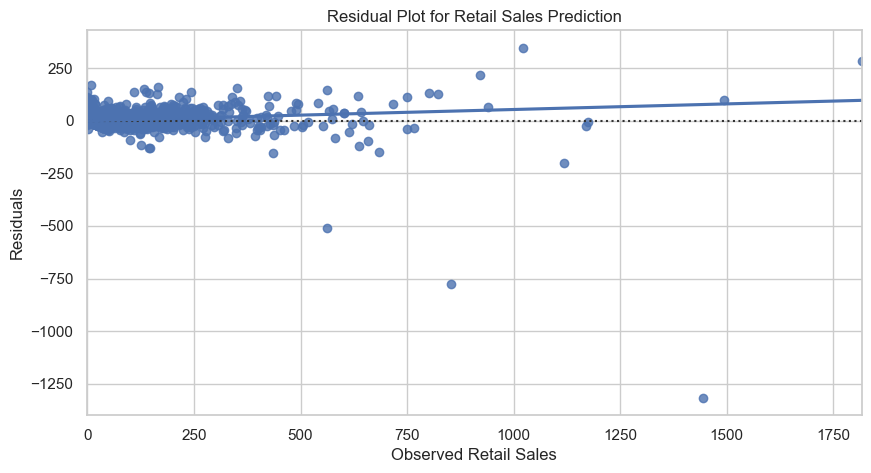

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = r'C:\Users\ADMIN PC\Downloads\projects\Navya DA2\Warehouse_and_Retail_Sales_Updated.csv'
df = pd.read_csv(file_path)

# Define feature columns and target columns
X = df[['YEAR', 'MONTH', 'SUPPLIER_ID', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']]
y_retail_sales = df['RETAIL SALES']
y_warehouse_sales = df['WAREHOUSE SALES']

# Preprocessing: Encode categorical variables and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['YEAR', 'MONTH', 'SUPPLIER_ID', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'])
    ])

# 1. Multiple Regression Analysis (for RETAIL SALES prediction)
print("Multiple Regression Analysis (Retail Sales Prediction)")
X_train, X_test, y_train_retail, y_test_retail = train_test_split(X, y_retail_sales, test_size=0.2, random_state=42)
regressor = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])
regressor.fit(X_train, y_train_retail)
y_pred_retail = regressor.predict(X_test)
print("Retail Sales - Mean Squared Error:", mean_squared_error(y_test_retail, y_pred_retail))
print("Retail Sales - R2 Score:", r2_score(y_test_retail, y_pred_retail))

# Regression Residual Plot
plt.figure(figsize=(10, 5))
sns.residplot(x=y_test_retail, y=y_pred_retail, lowess=True)
plt.xlabel("Observed Retail Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot for Retail Sales Prediction")
plt.show()

## Logistic Regression-for classification


Logistic Regression for Classification (High/Low Sales)
Logistic Regression Accuracy: 0.8856961757870273
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     38545
           1       0.96      0.73      0.83     22984

    accuracy                           0.89     61529
   macro avg       0.91      0.85      0.87     61529
weighted avg       0.89      0.89      0.88     61529



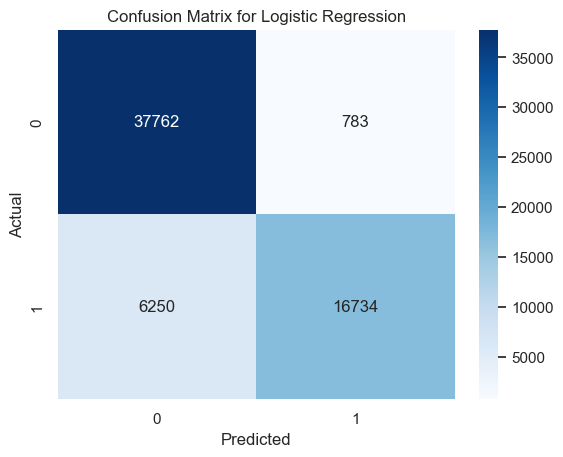

In [ ]:
# 2. Logistic Regression - Classification (High/Low Sales)
print("\nLogistic Regression for Classification (High/Low Sales)")
df['High_Sales'] = (df['RETAIL SALES'] > 1).astype(int)  # Define high sales threshold as > 1
y_high_sales = df['High_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y_high_sales, test_size=0.2, random_state=42)
classifier = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression())])
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## k-Nearest Neighbors (k-NN) Classification


k-Nearest Neighbors Classification (ITEM_CATEGORY Prediction)
k-NN Accuracy: 0.8132100310422727
              precision    recall  f1-score   support

          -1       0.54      0.43      0.48      2464
           0       0.86      0.90      0.88     37629
           1       0.77      0.69      0.73      8485
           2       0.74      0.73      0.73     12951

    accuracy                           0.81     61529
   macro avg       0.73      0.69      0.70     61529
weighted avg       0.81      0.81      0.81     61529



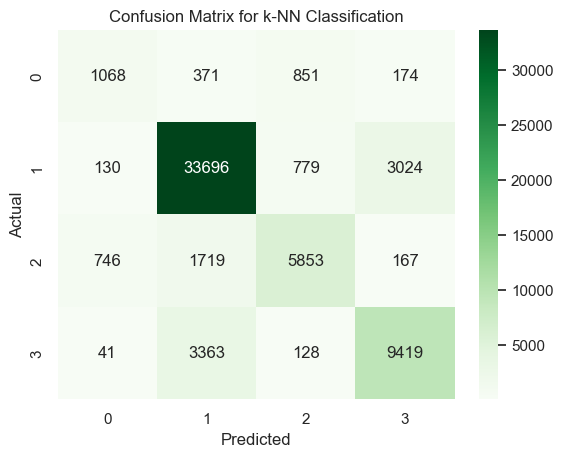

In [ ]:
# 3. k-Nearest Neighbors (k-NN) Classification (for ITEM_CATEGORY classification)
print("\nk-Nearest Neighbors Classification (ITEM_CATEGORY Prediction)")
df['ITEM_CATEGORY_NUM'] = df['ITEM_CATEGORY'].astype('category').cat.codes
y_item_category = df['ITEM_CATEGORY_NUM']
X_train, X_test, y_train, y_test = train_test_split(X, y_item_category, test_size=0.2, random_state=42)
knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('knn', KNeighborsClassifier(n_neighbors=5))])
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix for k-NN Classification
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-NN Classification')
plt.show()

## Decision Tree Regression & Classification


Decision Tree Regression (Warehouse Sales Prediction)
Warehouse Sales - Mean Squared Error: 160.02815974256043
Warehouse Sales - R2 Score: 0.9970939783999556


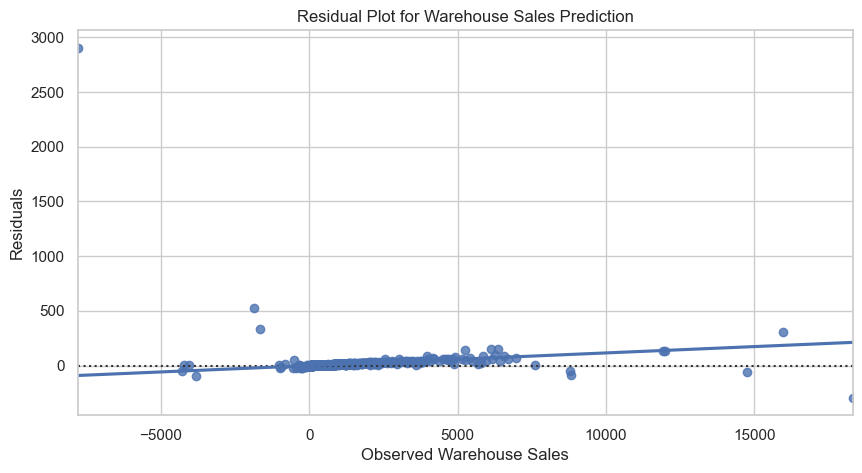


Decision Tree Classification (High/Low Sales)
Decision Tree Classification Accuracy: 0.8746769815859189
              precision    recall  f1-score   support

          -1       0.63      0.52      0.57      2464
           0       0.91      0.94      0.92     37629
           1       0.82      0.83      0.82      8485
           2       0.85      0.78      0.81     12951

    accuracy                           0.87     61529
   macro avg       0.80      0.77      0.78     61529
weighted avg       0.87      0.87      0.87     61529



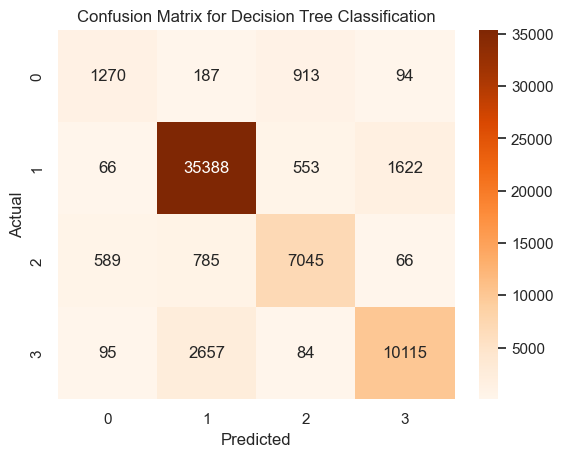

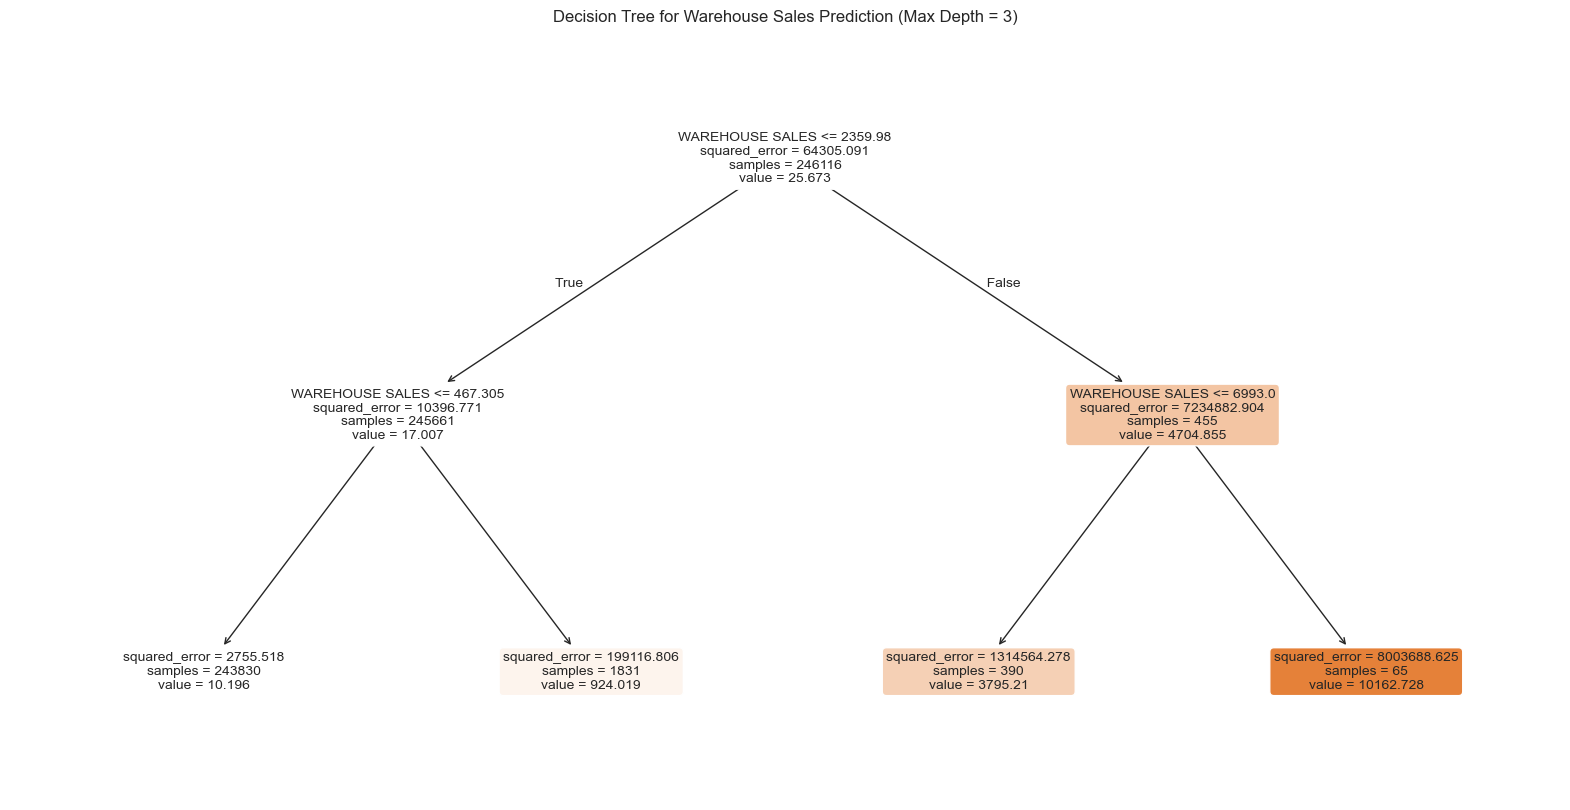

In [ ]:
# Split the dataset for warehouse sales prediction
X_train, X_test, y_train_retail, y_test_retail = train_test_split(X, y_retail_sales, test_size=0.2, random_state=42)
X_train_wh, X_test_wh, y_train_warehouse, y_test_warehouse = train_test_split(X, y_warehouse_sales, test_size=0.2, random_state=42)

# 4. Decision Tree - Regression for Warehouse Sales Prediction
print("\nDecision Tree Regression (Warehouse Sales Prediction)")
tree_regressor = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('tree_regressor', DecisionTreeRegressor(random_state=42))])
tree_regressor.fit(X_train_wh, y_train_warehouse)
y_pred_warehouse = tree_regressor.predict(X_test_wh)
print("Warehouse Sales - Mean Squared Error:", mean_squared_error(y_test_warehouse, y_pred_warehouse))
print("Warehouse Sales - R2 Score:", r2_score(y_test_warehouse, y_pred_warehouse))

# Residual Plot for Decision Tree Regression
plt.figure(figsize=(10, 5))
sns.residplot(x=y_test_warehouse, y=y_pred_warehouse, lowess=True)
plt.xlabel("Observed Warehouse Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot for Warehouse Sales Prediction")
plt.show()

print("\nDecision Tree Classification (High/Low Sales)")
tree_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('tree_classifier', DecisionTreeClassifier(random_state=42))])
tree_classifier.fit(X_train, y_train)
y_pred_tree = tree_classifier.predict(X_test)
print("Decision Tree Classification Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Confusion Matrix for Decision Tree Classification
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classification')
plt.show()

from sklearn.tree import plot_tree, DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a Decision Tree Regressor with max depth of 3
tree_regressor_model = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_regressor_model.fit(X_train_wh, y_train_warehouse)

# Plot the Decision Tree with a maximum depth of 3
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(tree_regressor_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Warehouse Sales Prediction (Max Depth = 3)")
plt.show()



## K Means Clustering


K-Means Clustering (Grouping Similar Products/Suppliers)


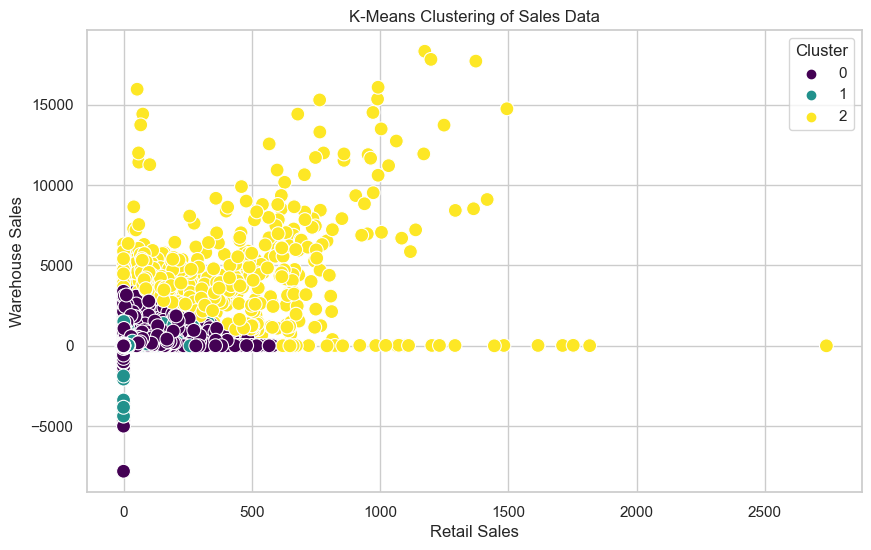

In [ ]:
# 5. K-Means Clustering
print("\nK-Means Clustering (Grouping Similar Products/Suppliers)")
X_cluster = df[['RETAIL SALES', 'WAREHOUSE SALES', 'SUPPLIER_ID']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RETAIL SALES', y='WAREHOUSE SALES', hue='Cluster', palette='viridis', s=100)
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.title('K-Means Clustering of Sales Data')
plt.legend(title='Cluster')
plt.show()
